# Growth and saturation amplitude
###### Using the equations from the Vasil paper producing a figure of rotation against magnetic field for growth, and a      for saturation amplitude

In [1]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt

### Growth rate

$$growth~rate \propto e^{\gamma t}$$
$$ \gamma^2 \approx  {{ \alpha^2 \omega^2_A ( 2 \Omega S - \omega^2_A (1 + \alpha^2)) } \over { \omega^2_A + 4 \Omega^2 }} $$
$$ \alpha = {{2H} \over {L}}$$
$$ H \colon NSSL~dpeth \approx 0.05 R_\odot $$
$$ L \colon Latitudinal~wavelength \approx 20^{\circ} R_\odot - 30^{\circ} R_\odot$$
$$ \omega_A \colon Alfven~wavelength $$
$$S \colon Shear $$
$$ \Omega \colon Angular~frequency$$


$$In~the~NSSL~which~the~instability~is~thoght~to~be~ \Omega \approx S$$

In [2]:
def Gamma_Squared(alpha, l_omega, u_omega, s):
    """ This function calculates gamma squared in accordance to the equation above.
    The function calculates the numerator and denominator seperatly then calculates gamma squared.
    alpha = 2H/L
    H: NSSL dpeth
    L: Latitudinal wavelength
    l_omega: ALfven wavelength
    s: Shear
    u_omega: Angular frequency"""

    numerator = alpha**2 * l_omega**2 * ((2 * u_omega * s) - (l_omega**2 * ( 1 + alpha**2)))
    denominator = l_omega**2 + ( 4 * u_omega**2)

    gamma_squared = numerator/denominator

    return gamma_squared

In [3]:
def Alpha(H, L):
    """Calculating alpha from the depth of the NSSL nad the latitudinal wavelength.
    alpha = 2H/L
    H: dpeth of NSSL. for the sun its 0.05 R_sun
    L: latitudinal wavelegth for the sun its 20-30 R_sun degrees"""
    
    alpha = 2 * H / L

    return alpha

Alfven frquency eqn from Vasil paper $$ \omega_A = {{B_0 k_r} \over { \sqrt{4 \pi \rho_0}}} $$
$$B_0 \colon background~poloidal~magnetic~field~strength$$
$$k_r \approx {\pi \over H_r}$$
$$H_r \colon relavent~layer~depth$$
$$\rho_0 \colon atmospheric~density$$

In [4]:
def Alfven_Frequency(B0, H, desinty):
    """Calculating the ALfven frequency using the above equation
    B0: magnetic field strength
    H: layer depth
    density: atmospheric density"""

    k = np.pi/H
    numerator = B0 * k
    denominator = np.sqrt(4 * np.pi * density)
    alfven_freq = numerator / denominator

    return alfven_freq

defineing variables

radius, anuglar veolocity, magnetic field strength and density have been chosen as arbeary numbers as currently i would need to do more research to have more reasonable values.

NSSL_depth is on the assumption that it is the same proportion of eth radius for all stars. currently i dont know if this is true or not. and requires further research

In [5]:
sun_r = 696e8
radius = np.linspace(0,20,200) * sun_r
#angular_frequency = np.ones(200) * 2.83e-6
angular_frequency = np.linspace(1e-10,1e-7,200)
density = 3 * 10**(-3)
mag_field_strength = 10
NSSL_depth = 0.05 * radius
shear = angular_frequency
latitudinal_wavelength20 = 20 * np.pi * sun_r / 180
latitudinal_wavelength30 = 30 * np.pi * sun_r / 180

angular_frequency

In [6]:
"""the alpha value which contains 30 degrees is about 0.3
the alpha value which contains 20 degrees is roughly 0.2. wierd"""

alfven = Alfven_Frequency(mag_field_strength, NSSL_depth, density)
alpha20 = Alpha(NSSL_depth, latitudinal_wavelength20)
alpha30 = Alpha(NSSL_depth, latitudinal_wavelength30)
gamma_squared20 = Gamma_Squared(alpha20, alfven, angular_frequency, shear)
gamma_squared30 = Gamma_Squared(alpha30, alfven, angular_frequency, shear)

/tmp/ipykernel_582/1288665931.py:7: RuntimeWarning: divide by zero encountered in divide
  k = np.pi/H
/tmp/ipykernel_582/1673302728.py:11: RuntimeWarning: invalid value encountered in multiply
  numerator = alpha**2 * l_omega**2 * ((2 * u_omega * s) - (l_omega**2 * ( 1 + alpha**2)))


alpha20

alfven 

gamma_squared20

Text(0.5, 0.98, 'gamma squared')

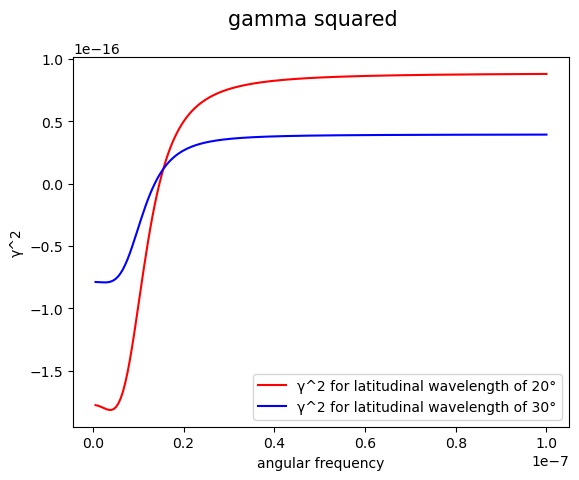

In [7]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(angular_frequency, gamma_squared20, color = "red", label = "γ^2 for latitudinal wavelength of 20°")
ax.plot(angular_frequency, gamma_squared30, color = "blue", label = "γ^2 for latitudinal wavelength of 30°")
ax.set_xlabel("angular frequency")
ax.set_ylabel("γ^2")
#ax.set_yscale('log')
ax.legend()
fig.suptitle("gamma squared", fontsize = "15")

$$ growth~rate = \gamma  $$

gamma_squared20

/tmp/ipykernel_582/3075269680.py:1: RuntimeWarning: invalid value encountered in sqrt
  growth_rate20 = np.sqrt(gamma_squared20)
/tmp/ipykernel_582/3075269680.py:3: RuntimeWarning: invalid value encountered in sqrt
  growth_rate30 = np.sqrt(gamma_squared30)


Text(0.5, 0.98, 'growth rate')

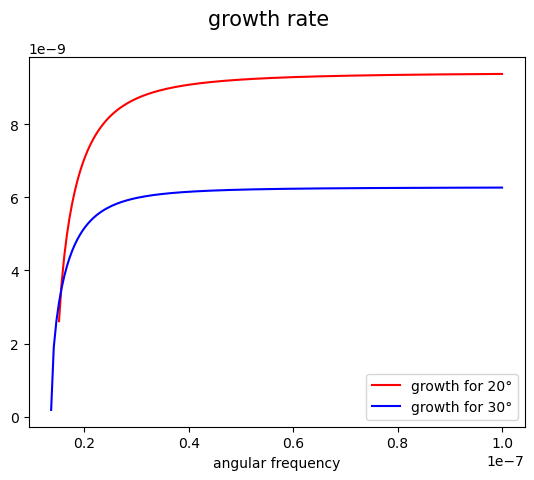

In [8]:
growth_rate20 = np.sqrt(gamma_squared20)

growth_rate30 = np.sqrt(gamma_squared30)


fig1 = plt.figure()
ax1 = fig1.add_subplot()
ax1.plot(angular_frequency, growth_rate20, color = "red", label = "growth for 20°")
ax1.plot(angular_frequency, growth_rate30, color = "blue", label = "growth for 30°")


ax1.set_xlabel("angular frequency")
#ax1.set_ylabel("G")
ax1.legend()
fig1.suptitle("growth rate", fontsize = "15")


In [11]:
growth_rate20/angular_frequency

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
       0.17220247, 0.23315557, 0.2715019 , 0.29782589, 0.31644742,
       0.32969643, 0.3390154 , 0.3453733 , 0.34945629, 0.35176835,
       0.35268942, 0.35251156, 0.3514627 , 0.34972276, 0.34743511,
       0.34471482, 0.34165485, 0.3383306 , 0.33480354, 0.33112385,
       0.32733266, 0.32346369, 0.31954462, 0.31559818, 0.31164301,
       0.30769438, 0.30376476, 0.29986432, 0.29600126, 0.29218222,
       0.28841246, 0.28469613, 0.28103644, 0.27743584, 0.27389609,
       0.27041841, 0.26700359, 0.26365201, 0.26036374, 0.25713861,
       0.2539762 , 0.25087593, 0.24783709, 0.24485881, 0.24194

### Same thing again but zoomed in on the changing part with out much of the flatter section.

/tmp/ipykernel_582/1288665931.py:7: RuntimeWarning: divide by zero encountered in divide
  k = np.pi/H
/tmp/ipykernel_582/1673302728.py:11: RuntimeWarning: invalid value encountered in multiply
  numerator = alpha**2 * l_omega**2 * ((2 * u_omega * s) - (l_omega**2 * ( 1 + alpha**2)))
/tmp/ipykernel_582/321833964.py:41: RuntimeWarning: invalid value encountered in sqrt
  growth_rate20 = np.sqrt(gamma_squared20)
/tmp/ipykernel_582/321833964.py:43: RuntimeWarning: invalid value encountered in sqrt
  growth_rate30 = np.sqrt(gamma_squared30)


Text(0.5, 0.98, 'growth rate')

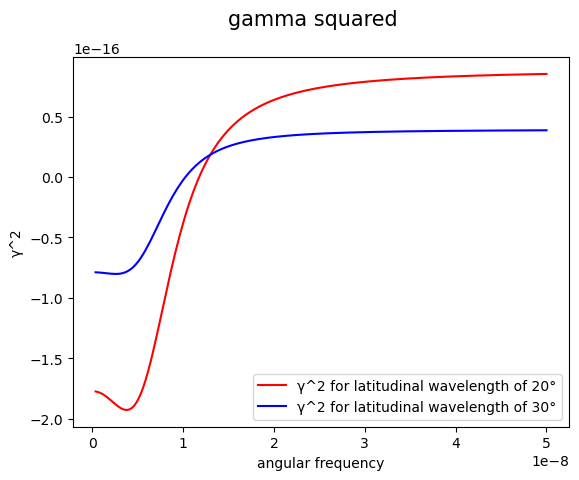

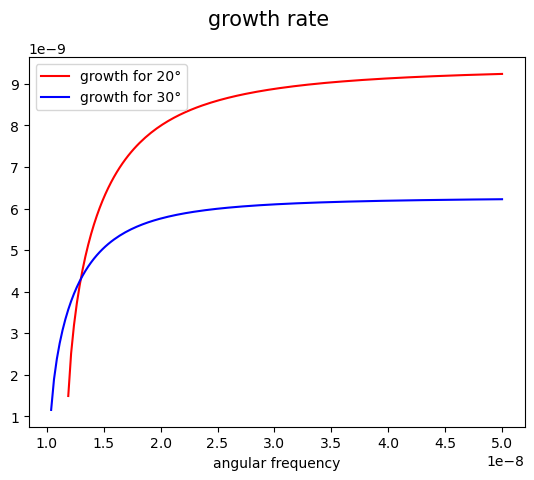

In [12]:
sun_r = 696e8
radius = np.linspace(0,20,200) * sun_r
#angular_frequency = np.ones(200) * 2.83e-6
angular_frequency = np.linspace(1e-10,5e-8,200)
density = 3 * 10**(-3)
mag_field_strength = 10
NSSL_depth = 0.05 * radius
shear = angular_frequency
latitudinal_wavelength20 = 20 * np.pi * sun_r / 180
latitudinal_wavelength30 = 30 * np.pi * sun_r / 180

"""the alpha value which contains 30 degrees is about 0.3
the alpha value which contains 20 degrees is roughly 0.2. wierd"""

"""#alfven = Alfven_Frequency(mag_field_strength, NSSL_depth, density)
#alpha20 = Alpha(NSSL_depth, latitudinal_wavelength20)
alpha20 = 0.3
alfven20 = angular_frequency
#alpha30 = Alpha(NSSL_depth, latitudinal_wavelength30)
alpha30 = 0.2
alfven30 = 0.1 * angular_frequency
#alfven = np.ones(99)
gamma_squared20 = Gamma_Squared(alpha20, alfven20, angular_frequency, shear)
gamma_squared30 = Gamma_Squared(alpha30, alfven30, angular_frequency, shear)"""

alfven = Alfven_Frequency(mag_field_strength, NSSL_depth, density)
alpha20 = Alpha(NSSL_depth, latitudinal_wavelength20)
alpha30 = Alpha(NSSL_depth, latitudinal_wavelength30)
gamma_squared20 = Gamma_Squared(alpha20, alfven, angular_frequency, shear)
gamma_squared30 = Gamma_Squared(alpha30, alfven, angular_frequency, shear)

fig2 = plt.figure()
ax2 = fig2.add_subplot()
ax2.plot(angular_frequency, gamma_squared20, color = "red", label = "γ^2 for latitudinal wavelength of 20°")
ax2.plot(angular_frequency, gamma_squared30, color = "blue", label = "γ^2 for latitudinal wavelength of 30°")
ax2.set_xlabel("angular frequency")
ax2.set_ylabel("γ^2")
ax2.legend()
fig2.suptitle("gamma squared", fontsize = "15")

growth_rate20 = np.sqrt(gamma_squared20)

growth_rate30 = np.sqrt(gamma_squared30)


fig1 = plt.figure()
ax1 = fig1.add_subplot()
ax1.plot(angular_frequency, growth_rate20, color = "red", label = "growth for 20°")
ax1.plot(angular_frequency, growth_rate30, color = "blue", label = "growth for 30°")


ax1.set_xlabel("angular frequency")
#ax1.set_ylabel("G")
ax1.legend()
fig1.suptitle("growth rate", fontsize = "15")
